In [2]:
##Main steps to follow for a ML project

#1 Look at the big picture.
#1.1 Frame the problem
#1.2 Select a performance measure
#1.3 Check and verify assumptions made.

#2 Import Python modules and get the data 
#2.1 Import Python modules
#2.2 Get the data
#2.2.1 Take a quick glance at the data

#3 Create training & test sets 
#3.1 Perform Startified Sampling.

#4 Discover and visualize the training set to get insights.
#4.1 Visualizing geographical data
#4.2 Looking for correlations between pairs of attributes
#4.3 Experimenting with attribute combinations

#5 Prepare the training set for Machine Learning algorithms.
#5.1 Data cleaning (handling missing values)
#5.2 Handling text and categorical Atrributes
#5.3 Custom Transformers 
#5.4 Feature Scaling
#5.5 Transformation pipelines
#5.5.1 Pipeline for numerical attributes
#5.5.2 Pipeline for categorical attributes
#5.5.3 Full Pipeline handing both numerical and categorical attributes

#6 Select and Train a Model
#6.1 Training and Evaluating a Model on the Training set using Cross-Validation
#6.1.1 Linear Regression
#6.1.2 Decision Tree Regressor
#6.1.3 Random Forest
#6.1.4 XGBoost
#6.2 Fine-tuning the hyperparameters 
#6.2.1 Tuning Decision Tree using Grid Search CV
#6.2.2 Tuning Random Forest using Grid Search
#6.2.3 Tuning XGBoost using Random Search CV
#6.3 Analyze the best models and their error

#7 Present your solution (Evaluate your system on the test set) #Usually only the best model. But I evaluate all of them just 
#7.1 Random Forest                                              #for the fun of it.
#7.2 XGBoost
#7.3 Ensemble of Models

#8 Launch, monitor and maintain your system.

#See appendix B for a thorough ML checklist.

In [3]:
##1 Look at the big picture

#Goal: To build a model of housing prices in California using the California census data.

#Target: median housing price.
#Features: population, median income, median housing price, etc...

#Ask the following questions:
#What is the business objective? How does the company expect to use and benefit from this model? 
#Will the model output be fed to another ML system? Is it a component within a pipeline?
#What the curent solutions look like? How are these prices curently estimated?
#These questions are important because they frame the algorithms to be used for training and evaluation.

#1.1 Frame the problem:

#A) Requires human supervision during training?: Yes (supervised). Each instance/feature comes with its label.

#B) Regression or classification task?: Regression (multiple[many features] and univariate[predicts a single value])

#C) On the fly learning?: No (batch learning)

#1.2 Select a performance measure

#A typical performance measure in regression problems is the Root Mean Square Error (RMSE), l2 norm. I gives an idea of how 
#much error the system typically makes in its predictions, with a higher weight for large errors. Hence, if there are many 
#outliers, the best option is to use the Mean Absolute Error (MAE), l1 norm.

#1.3 Check and verify assumptions made.
#This may influence if the output is a classification or a number.

In [4]:
##2 Import Python modules and get the data

#2.1 Import Python modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn.model_selection import StratifiedShuffleSplit
#from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.base import TransformerMixin, BaseEstimator
#from sklearn.preprocessing import StandardScaler
#from sklearn.pipeline import Pipeline
#from sklearn.pipeline import FeatureUnion
#from sklearn.model_selection import cross_val_score
#from sklearn.linear_model import LinearRegression
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import GridSearchCV
#from sklearn.metrics import mean_squared_error

In [5]:
#2.2 Get the data

housing = pd.read_csv("housing.csv")

In [6]:
#2.2.1 Take a quick glance at the data

In [7]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
housing.shape

(20640, 10)

In [9]:
housing.info() #General info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
housing["ocean_proximity"].value_counts() #explore the categorical attribute

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [11]:
housing.describe() #Summary of numerical attributes

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


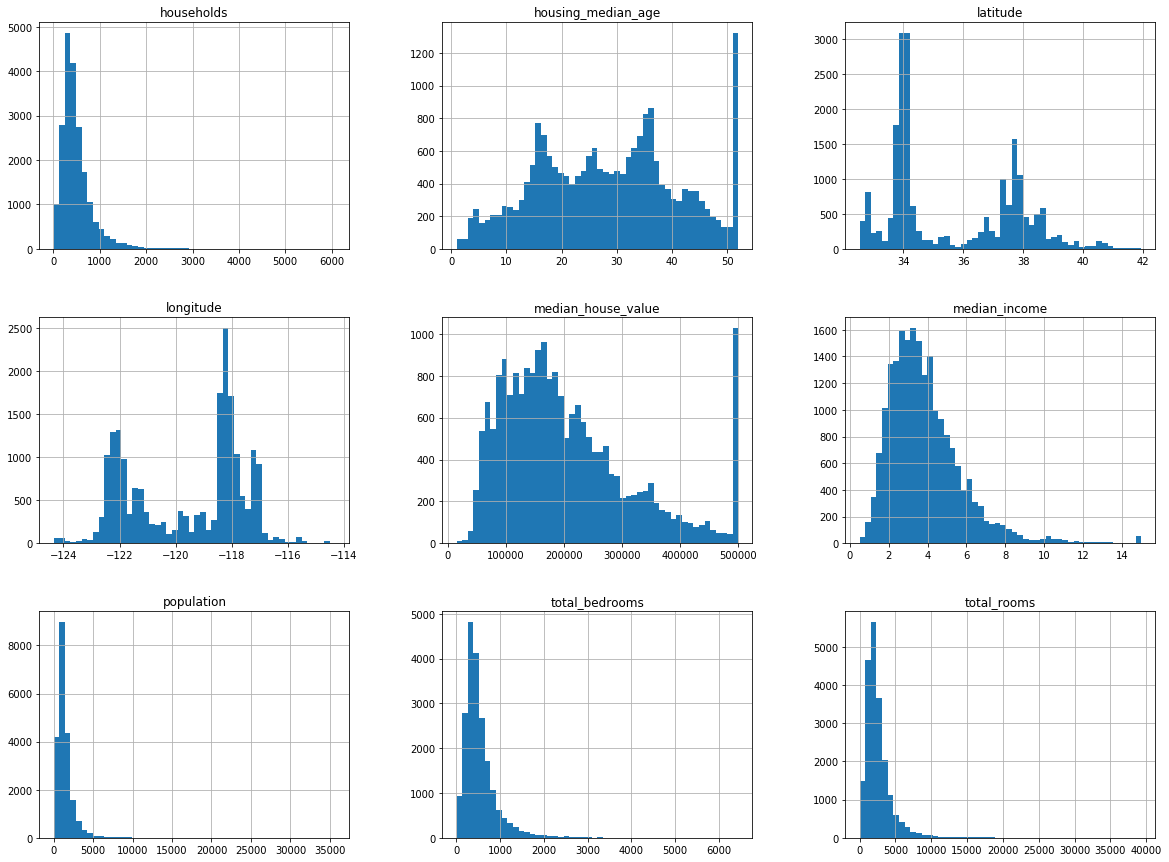

In [12]:
housing.hist(bins=50, figsize=(20,15)) #Plot histogram for numerical attributes.
plt.show()

In [13]:
#Takeaways from the histograms

#A The median income attribute has been pre-processed. It is not expressed in USD and the data has been scaled at 15 (15.001)
#for higher median incomes and 0.5 (0.4999) for lower median incomes. Each number represents $10K (i.e. 3 = $30K). 

#B The housing median age and the median house value were also capped. The latter is a problem beacuse it is my target attribute
#and the model may learn that prices never go > $500K.Ask the client team if they need precise predictions beyond $500K. If yes:
#a) Collect proper labels for the capped districts.
#b) Remove those districts from the data

#C The attributes have very different scales.

#D Many histograms are tail heavy to the right, making it difficult for ML algortihms to detect patterns.

In [14]:
##3 Create training & test sets  

#It is important to set aside the test set (tipically 20% of the datast) to avoid data snooping bias, a process by which
#the brain detects patterns a priori, leading you to develop an overfitting model.

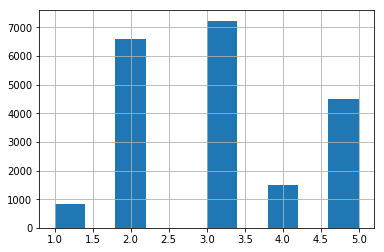

In [15]:
#3.1 Perform Startified Sampling.

#The stratified sampling guarantee that the test set is representative of the overall population. 
#Suppose that the experts told you that the median income is a very important attribute to predict median housing prices.
#Or simply you did a correlation analysis as later in #4.2 and figured it out.
#Hence, you must ensure that the test set is representative of the various categories of income in the whole dataset. 
#Since the median income is a continuous numerical attribute, you first need to create an income category attribute.

#The following code creates an income category attribute by dividing the median income by 1.5 (to limit the number of income
#categories) and rounding up using ceil (to have discrete categories), and then keeping only the categories lower than 5 and
#merging the other categories into category 5:

housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["median_income"] < 5, 5.0, inplace=True)
#print(housing["income_cat"])
housing["income_cat"].hist()
plt.show()

In [16]:
#Perform stratified sampling based on income categories

from sklearn.model_selection import StratifiedShuffleSplit #Returns stratified randomized folds for train/test sets, preserving
                                                           #the percentage of samples for each class.                                                           

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [17]:
#Check the income category proportions in test and full data sets (numbers)

print(strat_train_set["income_cat"].value_counts()/len(strat_train_set))
print(housing["income_cat"].value_counts()/len(housing["income_cat"]))

3.0    0.350594
2.0    0.318859
5.0    0.218447
4.0    0.072250
1.0    0.039850
Name: income_cat, dtype: float64
3.0    0.350581
2.0    0.318847
5.0    0.218459
4.0    0.072287
1.0    0.039826
Name: income_cat, dtype: float64


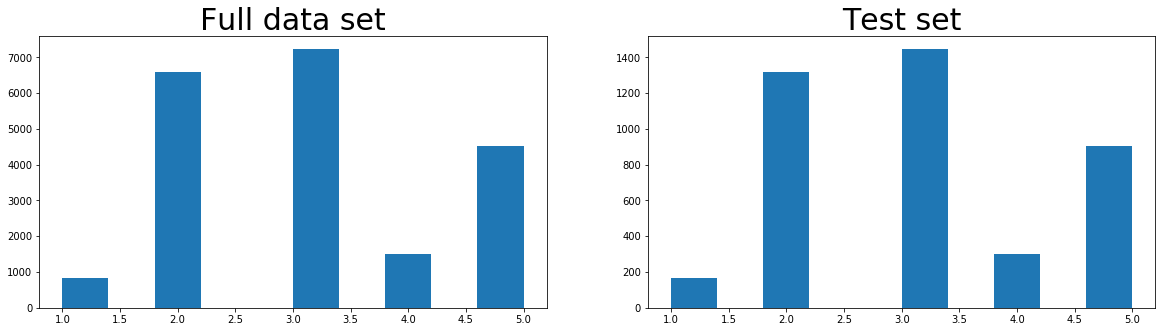

In [18]:
#check the income category proportions in test and full data sets (histograms)

fig, axes = plt.subplots(1, 2, figsize=(20, 5))
axes[0].hist(housing["income_cat"])
axes[0].set_title('Full data set', fontsize=30)

axes[1].hist(strat_test_set["income_cat"])
axes[1].set_title('Test set', fontsize=30)
plt.show()

In [19]:
#Now I have to drop the income_cat attribute so the data is back to its original state

for set_ in (strat_test_set, strat_train_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [20]:
##4 Discover and visualize the training set to get insights.

housing = strat_train_set.copy() #create a copy to play with it without harming the training set 

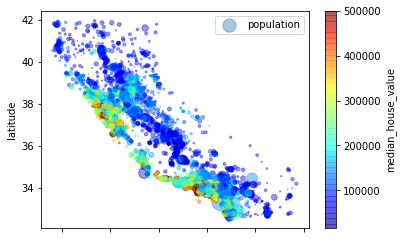

In [21]:
#4.1 Visualizing geographical data

housing.plot(kind="scatter", x="longitude", y="latitude", 
             alpha=0.4, #visualize density of data points
             s=housing["population"]/100, #Each circle represents the district's population.
             label="population",
             c="median_house_value", #color represents the prices
             cmap=plt.get_cmap("jet"), #gradient from low (blue) to high (red) values.
             colorbar=True,            
            )
plt.legend()

In [22]:
#4.2 Looking for correlations between pairs of attributes

corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687752
total_rooms           0.136422
housing_median_age    0.106985
households            0.066340
total_bedrooms        0.050081
population           -0.024622
longitude            -0.047586
latitude             -0.142814
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002379A3C6320>,
      dtype=object)

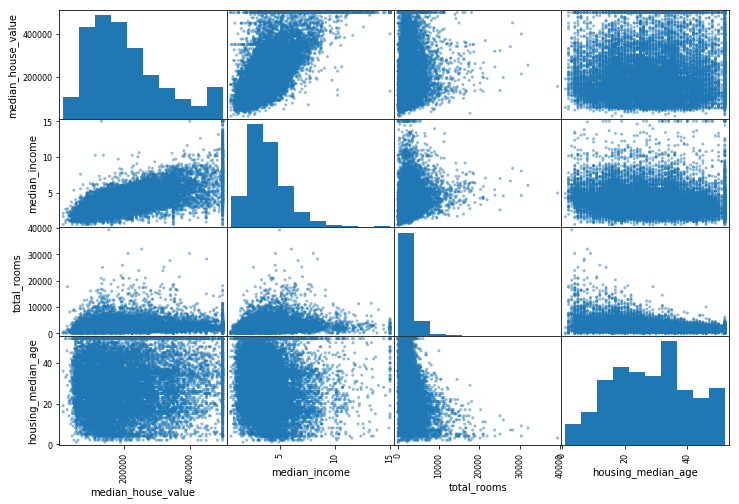

In [23]:
from pandas.plotting import scatter_matrix

attributes= ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

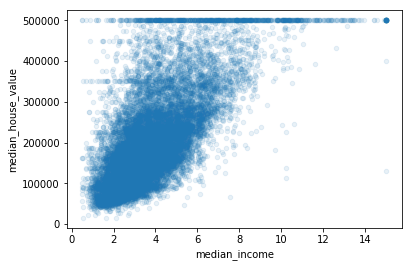

In [24]:
#From the above analysis it is clear that the median income is the most promisin attribute to predict the median house value

housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
plt.show()

In [25]:
#Warning: there are districts that generate straight lines in the graph at $500K, $350K, $280K, etc. You may want to remove
#those districts to prevent the model reproducing these data quirks. 

In [26]:
#4.3 Experimenting with attribute combinations (see pags 59-60)

In [27]:
##5 Prepare the training set for Machine Learning algorithms.

#Separate the predictors from the labels:

housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [28]:
#5.1 Data cleaning (handling missing values)

In [29]:
#The total_bedrooms attribute has some missing values that must be fixed. There are three options:
#*Get rid of the corresponding districts 
#housing.dropna(subset=["total_bedrooms", axis=1])

#*Get rid of the whole attribute 
#housing.drop("total_bedrooms", axis=1)

#*Set the values to some values (zero, the mean, the median)
#median = housing["total_bedrooms"].median()
#housing["total_bedrooms"].fillna(median, inplace=true)

#Another option is to use Imputer class from scikit-learn to replace missing values with the median of each attribute.
#See pag 62 for general info about scikit-learn design.

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

#Since the median can only be computed on numerical attributes, we need to create a copy of the data without the categorical
#attribute ocean proximity. Then, fit the imputer to the training data using the fit() method.

housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)

#The results are stored in the statistics_ instance variable of imputer.
imputer.statistics_

array([-118.52  ,   34.26  ,   29.    , 2120.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [30]:
#Now, the "trained" imputer can be used to transform the training set by replacing the missing values by the learned medians
X = imputer.transform(housing_num)

#"X" is a plain Numpy array containing the transformed features. To put it back into a Pandas DataFrame:

housing_tr = pd.DataFrame(X, columns=housing_num.columns)

housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.26,37.38,28.0,1103.0,164.0,415.0,154.0,7.8633
1,-118.43,34.07,38.0,3251.0,656.0,1251.0,593.0,7.7382
2,-117.12,32.80,29.0,2863.0,534.0,1392.0,522.0,3.8719
3,-117.06,34.87,14.0,3348.0,619.0,1756.0,557.0,3.5987
4,-122.36,37.58,37.0,3325.0,734.0,1468.0,692.0,4.0987


In [31]:
#5.2 Handling text and categorical Atrributes

In [32]:
#To fix this issue, a common solution is to create one binary attribute per category, known as one-hot encoding.
#The CategoricalEncoder class transforms from text categories to integer categories, then to one-hot vectors in one shot:

housing_cat = housing["ocean_proximity"]

from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()

housing_cat_reshaped = housing_cat.values.reshape(-1,1) #Convert from 1D to 2D array

housing_cat_1hot = cat_encoder.fit_transform(housing_cat_reshaped)

housing_cat_1hot #sparse matrix

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [33]:
#You can get a list of categories using the encoder's categories_ instance variable.
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [34]:
#5.3 Custom Transformers 

In [35]:
#5.3.1 There is nothing in Scikit-learn to handle DataFrames, but we can write a custom transformer for this task. 
#Our DataFrameSelector will transform the data by selecting the desired attributes, dropping the rest, and converting 
#the resulting DataFrame to a Numpy array. 

from sklearn.base import TransformerMixin #Adds fit_transform() method to a class.

from sklearn.base import BaseEstimator #Adds get_params() and set_params() methods to a class. These methods are useful for
                                       #hyperparameter tuning.

class DataFrameSelector (BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names): #OJO! two underscores at each side of init.
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
    


In [36]:
#5.3.2 You can also define a transformer class that adds combined attributes. For instance, in the example below,
      #the transformer has one hyperparameter, add_bedrooms_per_room, set to True by default, which will allow you to find if
      #if adding this attribute helps the ML algorithm or not.

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6 #column number in the dataset.

class CombineAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): #OJO! two underscores at each side of init.
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        bedrooms_per_rooms = X[:, bedrooms_ix] / X[:, rooms_ix]
        if self.add_bedrooms_per_room:
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_rooms]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
     
        
attr_adder = CombineAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)
housing_extra_attribs.shape

(16512, 11)

In [37]:
#5.4 Feature Scaling

#ML algorithms don't perform well when the input numerical attributes have very different scales, as is the case for the 
#housing data. Note that scaling the target values is generally not required. There are two common ways to scale attributes:

#1 Min-max scaling (normalization). Values are shofted and rescaled so that they end up ranging from 0 to 1. 
#Scikit-learn provides a transformer called MinMaxScaler for this.

#2 Standardization, the values have zero mean and unit variance. It doesn't bound values to a specific range.
#Scikit-learn provides a transformer called StandardScaler for this.

from sklearn.preprocessing import StandardScaler

In [38]:
#5.5 Transformation pipelines
#The Pipeline class helps with sequences of transformations. All but the last estimator must be transformers 
#(fit_transform() method).

from sklearn.pipeline import Pipeline

In [39]:
#5.5.1 Pipeline for numerical attributes

num_attribs = list(housing_num)

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy="median")),
    ('attr_adder', CombineAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

In [40]:
#5.5.2 Pipeline for categorical attributes

cat_attribs = ["ocean_proximity"]

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('cat_encoder', OneHotEncoder()),
])


In [41]:
#5.5.3 Full Pipeline handing both numerical and categorical attributes

from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared.shape

(16512, 16)

In [42]:
##6 Select and Train a Model

In [43]:
#6.1 Training and Evaluating on the Training set using Cross-Validation

#import cross-validation
from sklearn.model_selection import cross_val_score

#Define a function to obtain a summary of the scores
def display_scores(scores):
    print("Scores:", scores),
    print("Mean:", scores.mean()),
    print("Standard deviation:", scores.std())

In [44]:
#6.1.1 Linear regression

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, 
                             scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)

display_scores(lin_rmse_scores)

Scores: [66430.84465864 64703.73640457 66823.35880518 72590.89599293
 68485.97583421 72106.95908289 67827.46592893 68914.80050271
 70366.48419856 70183.29232193]
Mean: 68843.38137305388
Standard deviation: 2387.7273190501755


In [45]:
#6.1.2 Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()

tree_scores = cross_val_score(tree_reg, housing_prepared, housing_labels, 
                             scoring="neg_mean_squared_error", cv=10)

tree_rmse_scores = np.sqrt(-tree_scores)

display_scores(tree_rmse_scores)

Scores: [71168.3740254  71857.40101947 72715.10768366 69871.06601493
 74655.63736731 74455.22301006 69397.71384318 71852.27690694
 72679.03886549 72222.46824229]
Mean: 72087.43069787303
Standard deviation: 1614.4368982187389


In [46]:
#6.1.3 Random Forest

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                               scoring="neg_mean_squared_error", cv=10)

forest_rmse_scores = np.sqrt(-forest_scores)

display_scores(forest_rmse_scores)

C:\Users\wmiranda\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\wmiranda\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\wmiranda\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\wmiranda\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\wmiranda\Anaconda3\lib\site-packages\sklearn\ensemble\f

Scores: [52982.13280201 50147.18468866 49540.38823233 54422.72066952
 53810.47861477 56857.57082052 53318.04206543 50894.06170092
 55890.26223443 54787.48635281]
Mean: 53265.032818140506
Standard deviation: 2303.303638635947


In [64]:
#6.1.4 XGBoost 

#import pip
#!pip install xgboost

import xgboost as xgb

xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)

xgb_scores = cross_val_score(xgb_reg, housing_prepared, housing_labels,
                               scoring="neg_mean_squared_error", cv=10)

xgb_rmse_scores = np.sqrt(-xgb_scores)

display_scores(xgb_rmse_scores)

C:\Users\wmiranda\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\wmiranda\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\wmiranda\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\wmiranda\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\wmiranda\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Us

Scores: [52641.19644218 50095.78508491 52017.67232442 53546.37817975
 54243.73584945 56585.36022055 52494.79528808 52260.44541712
 56409.47975428 55951.06324321]
Mean: 53624.59118039366
Standard deviation: 2036.2403009955162


In [ ]:
#6.2 Fine-tuning the hyperparameters of your model

In [129]:
#6.2.1 Tuning Decision Tree using Grid Search CV

from sklearn.model_selection import GridSearchCV #Useful for a few values. For a big hyperparameter space, RandomSearchCV is
                                                                           #recommended.

param_grid = {
     'max_features':[0.2, 0.4, 0.6, 0.8],
     'min_samples_leaf':[0.1, 0.3, 0.5, 1],
     'max_depth': [1, 4, 6, 8]
    }

tree_grid_search = GridSearchCV(tree_reg, param_grid, cv=10,
                          scoring="neg_mean_squared_error")

tree_grid_search.fit(housing_prepared, housing_labels)

print("Best parameters found: ", tree_grid_search.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(tree_grid_search.best_score_)))

Best parameters found:  {'max_depth': 8, 'max_features': 0.8, 'min_samples_leaf': 1}
Lowest RMSE found:  63140.2261226764


In [75]:
#6.2.2 Tuning Random Forest using Grid Search CV


from sklearn.model_selection import GridSearchCV #Useful for a few values. For a big hyperparameter space, RandomSearchCV is
                                                                           #recommended.

param_grid = {
     'n_estimators': [3, 10, 30], 
     'max_features':[2, 4, 6, 8],
     'min_samples_leaf':[0.1, 0.3, 0.5, 1],
     'max_depth': [1, 4, 6, 8]
    }

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=10,
                          scoring="neg_mean_squared_error")

grid_search.fit(housing_prepared, housing_labels)

print("Best parameters found: ", grid_search.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_search.best_score_)))

Best parameters found:  {'max_depth': 8, 'max_features': 8, 'min_samples_leaf': 1, 'n_estimators': 30}
Lowest RMSE found:  55667.568457349545


In [76]:
#get the best estimator
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [77]:
#get evaluation score for each model
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

103512.14658986255 {'max_depth': 1, 'max_features': 2, 'min_samples_leaf': 0.1, 'n_estimators': 3}
103976.64209945078 {'max_depth': 1, 'max_features': 2, 'min_samples_leaf': 0.1, 'n_estimators': 10}
103084.27275806284 {'max_depth': 1, 'max_features': 2, 'min_samples_leaf': 0.1, 'n_estimators': 30}
110034.47085279186 {'max_depth': 1, 'max_features': 2, 'min_samples_leaf': 0.3, 'n_estimators': 3}
109513.03898871707 {'max_depth': 1, 'max_features': 2, 'min_samples_leaf': 0.3, 'n_estimators': 10}
109833.96877663526 {'max_depth': 1, 'max_features': 2, 'min_samples_leaf': 0.3, 'n_estimators': 30}
115808.75514383576 {'max_depth': 1, 'max_features': 2, 'min_samples_leaf': 0.5, 'n_estimators': 3}
115811.95981784548 {'max_depth': 1, 'max_features': 2, 'min_samples_leaf': 0.5, 'n_estimators': 10}
115810.67695583432 {'max_depth': 1, 'max_features': 2, 'min_samples_leaf': 0.5, 'n_estimators': 30}
109026.35571868106 {'max_depth': 1, 'max_features': 2, 'min_samples_leaf': 1, 'n_estimators': 3}
103363

In [68]:
#6.2.3 Tuning XGBoost using Random Search CV

from sklearn.model_selection import RandomizedSearchCV

param_grid = {'learning_rate': np.arange(0.05, 1.05, 0.05), 
              'n_estimators':np.arange(100, 250, 50),
              'sub_sample': np.arange(0.05, 1.05, 0.05)}

xgb_reg = xgb.XGBRegressor(objective='reg:squarederror')

xgb_randn_search = RandomizedSearchCV(xgb_reg, param_grid, cv=10,
                          scoring="neg_mean_squared_error", n_iter=25)

xgb_randn_search.fit(housing_prepared, housing_labels)

print("Best parameters found: ", xgb_randn_search.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(xgb_randn_search.best_score_)))

C:\Users\wmiranda\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\wmiranda\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\wmiranda\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\wmiranda\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\wmiranda\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Us

C:\Users\wmiranda\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\wmiranda\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\wmiranda\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\wmiranda\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\wmiranda\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Us

C:\Users\wmiranda\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\wmiranda\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\wmiranda\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\wmiranda\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\wmiranda\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Us

C:\Users\wmiranda\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\wmiranda\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\wmiranda\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\wmiranda\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\wmiranda\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Us

C:\Users\wmiranda\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\wmiranda\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\wmiranda\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\wmiranda\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\wmiranda\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Us

C:\Users\wmiranda\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\wmiranda\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\wmiranda\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\wmiranda\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\wmiranda\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Us

Best parameters found:  {'sub_sample': 0.5, 'n_estimators': 200, 'learning_rate': 0.3}
Lowest RMSE found:  48648.12035348409


In [51]:
#6.3 Analyze the best models and their error

#Again, we choose Random Forest as example. In this case, we will explore feature importance.

feature_importances = grid_search.best_estimator_.feature_importances_

extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = cat_pipeline.named_steps["cat_encoder"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)


[(0.35621376980788483, 'median_income'),
 (0.1588021174055117, 'INLAND'),
 (0.11278732831622275, 'pop_per_hhold'),
 (0.07035533271510964, 'longitude'),
 (0.06965614120637419, 'rooms_per_hhold'),
 (0.06127599347074718, 'latitude'),
 (0.055120017822036536, 'bedrooms_per_room'),
 (0.04484295254253493, 'housing_median_age'),
 (0.015308806940488274, 'total_rooms'),
 (0.014968544842254981, 'total_bedrooms'),
 (0.014729167781205086, 'population'),
 (0.013534083754872866, 'households'),
 (0.005941389503565153, '<1H OCEAN'),
 (0.003704561245210572, 'NEAR OCEAN'),
 (0.002687645556347263, 'NEAR BAY'),
 (7.21470896340375e-05, 'ISLAND')]

In [ ]:
#7 Present your solution (Evaluate your system on the test set)

In [52]:
#7.1 Random Forest

final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

from sklearn.metrics import mean_squared_error

final_mse = mean_squared_error(y_test, final_predictions)

final_rmse = np.sqrt(final_mse)
final_rmse

46759.24606763723

In [78]:
#7.2 XGBoost

final_model = xgb_randn_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

from sklearn.metrics import mean_squared_error

final_mse = mean_squared_error(y_test, final_predictions)

final_rmse = np.sqrt(final_mse)
final_rmse

45589.570846915485

In [130]:
#7.3 Ensemble of Models (they should be optimized first)

#Define a list called "regressors" that contains the tuples (regressor_name, regressor)
regressors = [
    ('Decision Tree', tree_grid_search.best_estimator_),
    ('Random Forest', grid_search.best_estimator_),
    ('XGBoost', xgb_randn_search.best_estimator_)    
]

#Define array to add RMSEs

rmse_arr = np.array([])
#rmse_arr = np.empty((0, 100))

#Iterate over the defined list of tuples containing the regressors:

for reg_name, reg in regressors:

    y_pred = reg.predict(X_test_prepared)
    
    reg_mse = mean_squared_error(y_test, y_pred)

    reg_rmse = np.sqrt(reg_mse)

    rmse_arr = np.append(rmse_arr, reg_rmse)
    
    print("RMSE for ", reg_name, "=", reg_rmse)
   
print("Mean RMSE =", np.mean(rmse_arr))
print("STD =", np.std(rmse_arr))




RMSE for  Decision Tree = 60252.32304193534
RMSE for  Random Forest = 52471.87058277095
RMSE for  XGBoost = 45589.570846915485
Mean RMSE = 52771.254823873925
STD = 5989.785676522186
